In [24]:
import pandas as pd
import numpy as np
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log2 as log
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.metrics import r2_score
from math import sqrt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read Datasets

In [47]:
df1 = pd.read_csv('OnlineNewsPopularity.csv')
df2 = pd.read_csv('voice.csv')
df3 = pd.read_csv('abalone_csv.csv')

# Drop noisy raws

In [48]:
df1.drop(['url'],axis=1,inplace=True)
df1.drop([' timedelta'],axis=1,inplace=True)
df1.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Check that there's no missing values

In [193]:
df1.isnull().sum()

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

# Remove outliers that's more the 9999

In [148]:
df1Dataset = df1.copy()
outliers = df1Dataset[' shares']
removed_outliers = outliers.between(outliers.quantile(0), outliers.quantile(.999))
print(removed_outliers.value_counts())
df1Dataset.head()

True     39626
False       18
Name:  shares, dtype: int64


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# Visualize

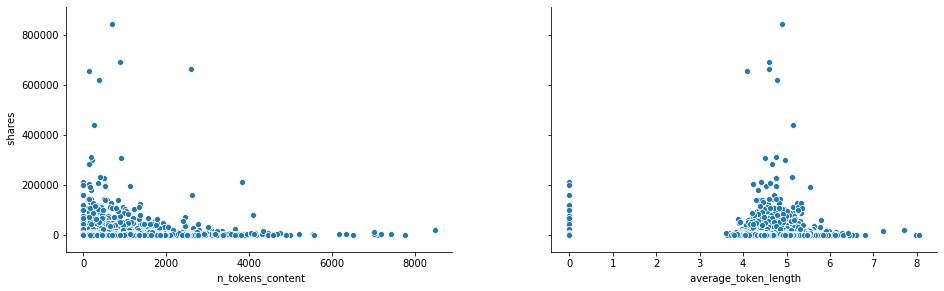

In [149]:
F = sns.pairplot(data = df1Dataset, y_vars=[' shares'], x_vars=[' n_tokens_content', ' average_token_length'])
F.fig.set_size_inches(15,5)

In [150]:
df2.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Check there's no missing values

In [194]:
df2.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Convert the label to 0 or 1

In [49]:
df2["label"] = df2["label"].astype('category')
df2["label"] = df2["label"].cat.codes
df2.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Visualize

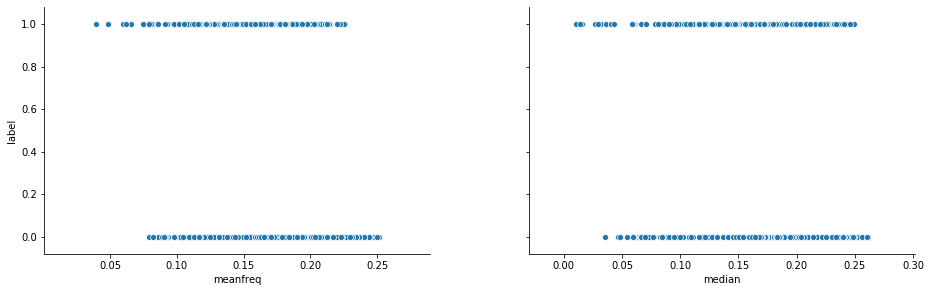

In [153]:
S = sns.pairplot(data = df2Dataset, y_vars=['label'], x_vars=['meanfreq', 'median'])
S.fig.set_size_inches(15,5)

In [154]:
df3.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Check that there's no missing values

In [195]:
df3.isnull().sum()

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
dtype: int64

# Label encoding

In [50]:
df3["Sex"] = df3["Sex"].astype('category')
df3["Sex"] = df3["Sex"].cat.codes
df3.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# visualize the frequency of each class to detect the most high class frequency

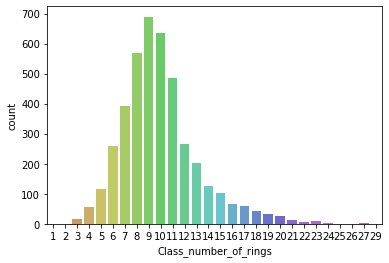

In [180]:
sn.countplot(x='Class_number_of_rings',data=df3, palette='hls')

# Select the most high two classes in frequncy and drop the rest of dataset

In [51]:
df3 = df3[(df3['Class_number_of_rings'] == 9) | (df3['Class_number_of_rings'] == 10)]

# Visualize

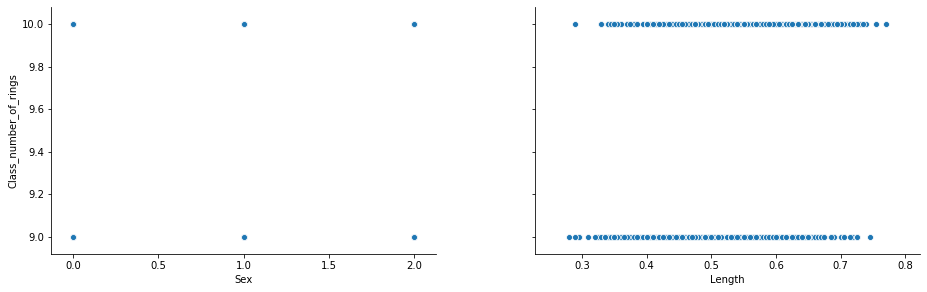

In [182]:
L = sns.pairplot(data = df3, y_vars=['Class_number_of_rings'], x_vars=['Sex', 'Length'])
L.fig.set_size_inches(15,5)

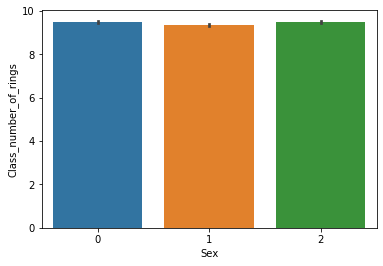

In [192]:
ax = sns.barplot(x="Sex", y="Class_number_of_rings", data=df3)

In [13]:
df1

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Build linear regression model

In [206]:
cols = df1.columns 
X1 = df1.iloc[:,:-1].values
y1 = df1.iloc[:,58].values

In [207]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.25,random_state=1)

In [208]:
reg = linear_model.LinearRegression()
reg.fit(X_train1,y_train1)
yp1=reg.predict(X_test1)
print(yp1)

[ 5147.47184666  1762.68400484 -1645.65490191 ...  7018.4454209
  2283.24859549  2263.96955168]


In [209]:
r2_score(y_test1,yp1)

0.01783564614151234

In [232]:
df2

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [41]:
df2.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


# Build decision tree model

In [71]:
cols = df2.columns 
X2 = df2.iloc[:,:-1].values
y2 = df2.iloc[:,20].values

In [72]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,y_train2)

In [76]:
yp2 = clf.predict(X_test2)

In [77]:
print("Accuracy:",metrics.accuracy_score(y_test2, yp2))

Accuracy: 0.9705573080967402


# Feature reduction and selection

In [78]:
sfs1 = SFS(svclassifier, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(X2, y2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.9s finished

[2020-12-11 23:43:54] Features: 1/10 -- score: 0.9526515151515151[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   23.9s finished

[2020-12-11 23:44:18] Features: 2/10 -- score: 0.9573863636363636[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   13.6s finished

[2020-12-11 23:44:31] Features: 3/10 -- score: 0.9602272727272727[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [79]:
features =map(int,sfs1.k_feature_names_)
indexis = []
for i in sfs1.k_feature_names_:
    indexis.append(int(i))
indexis

[0, 2, 4, 7, 10, 11, 12, 13, 15, 17]

In [80]:
df2Dataset = df2.iloc[:,indexis]
df2Dataset

,meanfreq,median,Q75,kurt,mode,centroid,meanfun,minfun,meandom,maxdom
0,0.059781,0.032027,0.090193,274.402906,0.000000,0.059781,0.084279,0.015702,0.007812,0.007812
1,0.066009,0.040229,0.092666,634.613855,0.000000,0.066009,0.107937,0.015826,0.009014,0.054688
2,0.077316,0.036718,0.131908,1024.927705,0.000000,0.077316,0.098706,0.015656,0.007990,0.015625
3,0.151228,0.158011,0.207955,4.177296,0.083878,0.151228,0.088965,0.017798,0.201497,0.562500
4,0.135120,0.124656,0.206045,4.333713,0.104261,0.135120,0.106398,0.016931,0.712812,5.484375
...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.153707,0.201144,6.630383,0.200836,0.131884,0.182790,0.083770,0.832899,4.210938
3164,0.116221,0.076758,0.204911,2.503954,0.013683,0.116221,0.188980,0.034409,0.909856,3.679688
3165,0.142056,0.183731,0.224360,6.604509,0.008006,0.142056,0.209918,0.039506,0.494271,2.937500
3166,0.143659,0.184976,0.219943,5.388298,0.212202,0.143659,0.172375,0.034483,0.791360,3.593750


# Build support Vector Machine Model

In [82]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train2, y_train2)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
y_pred = svclassifier.predict(X_test2)

In [90]:
print(confusion_matrix(y_test2,y_pred))
print(classification_report(y_test2,y_pred))

[[396  61]
 [ 12 482]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       457
           1       0.89      0.98      0.93       494

    accuracy                           0.92       951
   macro avg       0.93      0.92      0.92       951
weighted avg       0.93      0.92      0.92       951



In [92]:
df3

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,2,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
13,0,0.535,0.405,0.145,0.6845,0.2725,0.1710,0.2050,10
...,...,...,...,...,...,...,...,...,...
4169,2,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
4170,2,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


# Build Logistic Regression Model

In [124]:
cols = df3.columns 
X3 = df3.iloc[:,:-1].values
y3 = df3.iloc[:,8].values

In [125]:
LogisticRegression(max_iter=10000000)
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.3,random_state=0)

In [126]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train3)
X_test = sc.transform(X_test3)

In [127]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train3,y_train3)
yp3=logistic_regression.predict(X_test3)

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
logistic_regression.score(X_test3, y_test3)

0.6221662468513854

In [244]:
confusion_matrix = pd.crosstab(y_test3, yp3, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted   9    10
Actual             
9          143   63
10          87  104


In [130]:
print('Accuracy: ',metrics.accuracy_score(y_test3, yp3))
plt.show()

Accuracy:  0.6221662468513854


# Calculate Root Mean Square Error

In [155]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test1,yp1))
RMSE

9899.469389607937

# Plot Acctual Y vs Predicted Y 

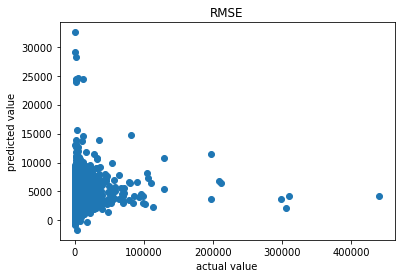

In [266]:
plt.plot(y_test1,yp1,'o')
plt.title('RMSE')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

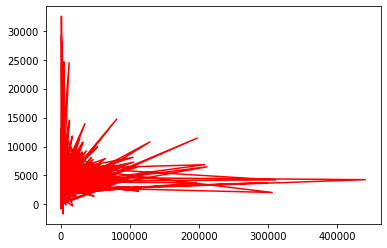

In [267]:
plt.plot(y_test1, yp1, "r-")

# Learning Curves

[learning_curve] Training set sizes: [  267   808  1348  1889  2430  2970  3511  4052  4592  5133  5674  6214
  6755  7295  7836  8377  8917  9458  9999 10539 11080 11621 12161 12702
 13242 13783 14324 14864 15405 15946 16486 17027 17568 18108 18649 19190
 19730 20271 20811 21352 21893 22433 22974 23515 24055 24596 25137 25677
 26218 26759]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   45.4s finished


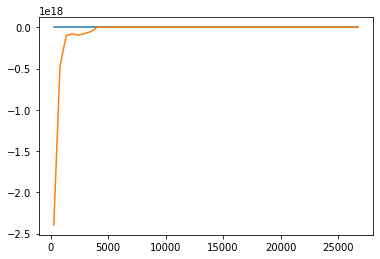

In [238]:
train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), X_train1, y_train1, cv=10,  n_jobs=-1, train_sizes= np.linspace(0.01,1,50), verbose=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label = "Training Score")
plt.plot(train_sizes, test_mean, label = 'Cross-validation Score')

[learning_curve] Training set sizes: [  19   60  100  140  181  221  261  302  342  382  423  463  503  543
  584  624  664  705  745  785  826  866  906  947  987 1027 1067 1108
 1148 1188 1229 1269 1309 1350 1390 1430 1471 1511 1551 1591 1632 1672
 1712 1753 1793 1833 1874 1914 1954 1995]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.7s finished


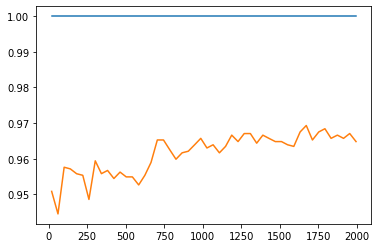

In [257]:
train_sizes, train_scores, test_scores = learning_curve(DecisionTreeClassifier(), X_train2, y_train2, cv=10,  n_jobs=-1, train_sizes= np.linspace(0.01,1,50), verbose=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label = "Training Score")
plt.plot(train_sizes, test_mean, label = 'Cross-validation Score')

[learning_curve] Training set sizes: [  19   60  100  140  181  221  261  302  342  382  423  463  503  543
  584  624  664  705  745  785  826  866  906  947  987 1027 1067 1108
 1148 1188 1229 1269 1309 1350 1390 1430 1471 1511 1551 1591 1632 1672
 1712 1753 1793 1833 1874 1914 1954 1995]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.7s finished


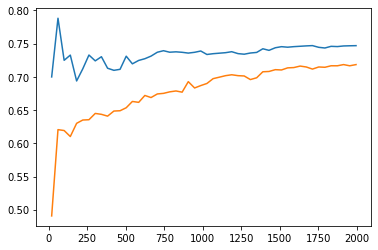

In [259]:
train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train2, y_train2, cv=10,  n_jobs=-1, train_sizes= np.linspace(0.01,1,50), verbose=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label = "Training Score")
plt.plot(train_sizes, test_mean, label = 'Cross-validation Score')

# detecting domain of Online News Popaluraity

In [252]:
dfs = df1[" n_tokens_content"].unique()
pd.DataFrame(dfs)

,0
0,219.0
1,255.0
2,211.0
3,531.0
4,1072.0
...,...
2401,1645.0
2402,2776.0
2403,2090.0
2404,2377.0


# Another Way For Learning Curves

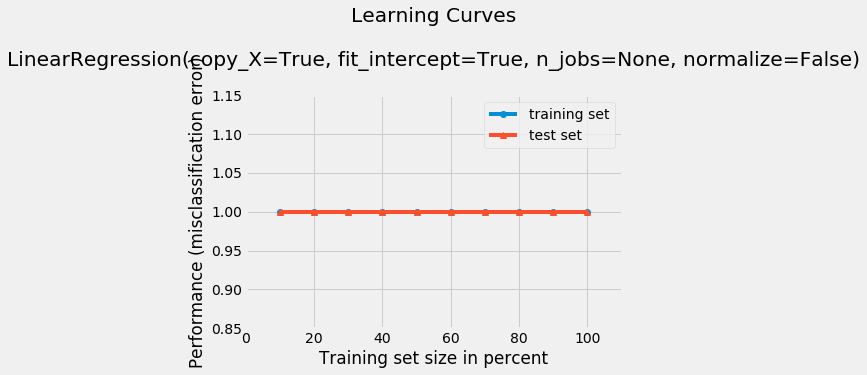

In [256]:
from mlxtend.plotting import plot_learning_curves
clf = LinearRegression()
plot_learning_curves(X_train1, y_train1, X_test1, y_test1, clf)
plt.show()

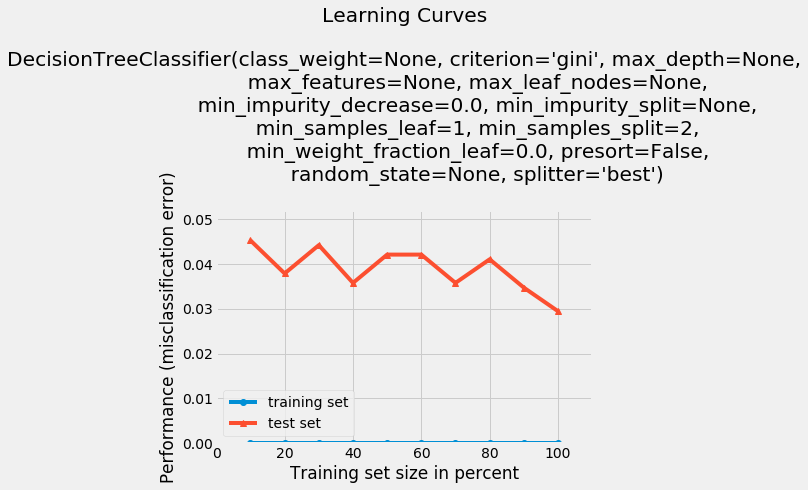

In [263]:
from mlxtend.plotting import plot_learning_curves
clf = DecisionTreeClassifier()
plot_learning_curves(X_train2, y_train2, X_test2, y_test2, clf)
plt.show()

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\svm\base.py:193:

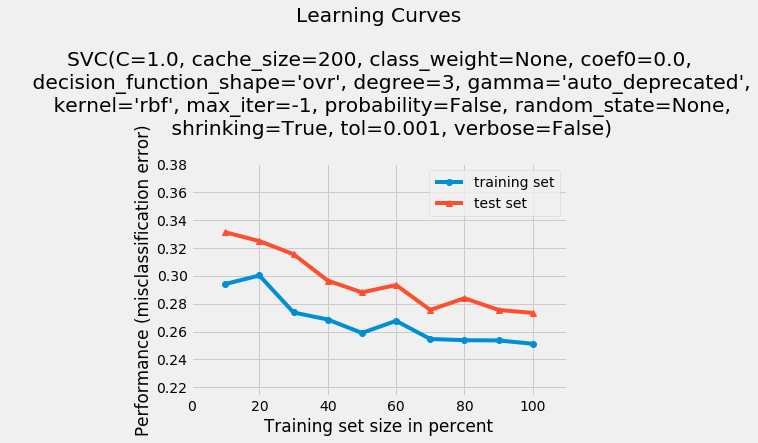

In [264]:
from mlxtend.plotting import plot_learning_curves
clf = SVC()
plot_learning_curves(X_train2, y_train2, X_test2, y_test2, clf)
plt.show()

C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\arabtech\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

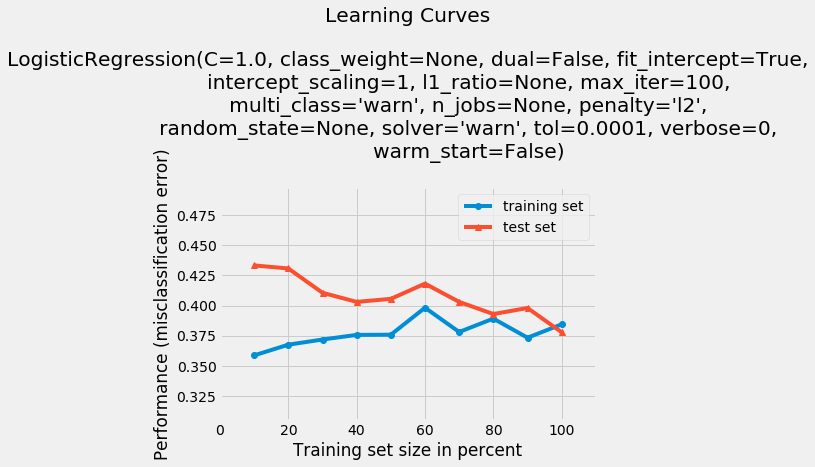

In [265]:
from mlxtend.plotting import plot_learning_curves
clf = LogisticRegression()
plot_learning_curves(X_train3, y_train3, X_test3, y_test3, clf)
plt.show()